### DS 220 – Project #2 on Data Analysis with Python
### Maxim Livit
#### Introduction: 
I decided to analyze the Men's Professional Basketball dataset from Kaggle.com
The dataset is comprised of statistics on players, coaches, and teams that were part of varying professional men's basketball leagues from 1937 to 2012. After analyzing and familiarizing myself with the dataset, I deemed it a rich collection of historical and statistical data from the world of basketball. It includes multiple interconnected tables detailing various aspects of the sport, ranging from specific player performance and draft statistics to coaching achievements and Hall of Fame inductees. This breadth of data provides an unparalleled opportunity to explore trends and patterns that have shaped basketball over the decades, offering insights into player performance, team dynamics, and league evolution.

I chose to work with this dataset for a multitude of reasons. The first of which being that this is an area I'm familiar with. Having played and watched basketball for many years now, I found it best to bridge the gap of large data analysis with tables I could better understand, correlate, and clarify. Another reason I chose this data is for the questions I wanted to answer. With the data available from this dataset, I wanted to frame my questions with a combination of answering valid and important questions, while adding twists to keep each output unique. Overall, however, I believe the questions that I answered throughout this analysis achieved many things. This included understanding player performance by examining efficiency trends and highlighting outliers, diving deeper into the compromisation of some of basketball's most prestigious awards, and comparing different trends to find greater relationships and possible historical shifts. Most importantly, each inquiry not only reveals patterns and anomalies but also celebrates the stories behind the numbers, bringing the rich history of basketball to life.

#### Data Exploration:

The Men's Professional Basketball dataset contains 10 (.csv) files, each corresponding to a data table. Each table is made up of different columns relevent to that specific data. 

The four main tables (basketball_) and their fields are: <br>
**Master** (containing biographical information for all the players and coaches) is made up of bioID (master unique ID for player or coach), useFirst (first name this person went by), firstName, middleName, lastName, nameGiven, fullGivenName, nameSuffix, nameNick, pos (position played), firstseason, lastseason, height, weight, college, collegeOther, birthDate, birthCity, birthState, birthCountry, highSchool, hsCity, hsState, hsCountry, deathDate, and race <br>
**Teams** (containing stats on each team, per year) is made up of year, lgID, tmID, franchID, confID, divID, rank, confRank, playoff (playoff outcome that season), and name (full team name) <br>
**Coaches** (containing stats for each coach, per year) is made up of coachID, year, tmID, lgID, stint (seasons played with team), won, lost, post_wins (post season wins), and post_losses (post season losses) <br>
**Series_post** (containing information on post-season winners, per year) is made up of year, round, series, tmIDWinner, lgIDWinner, tmIDLoser, lgIDLoser, W (games won by winner), and L (games won by loser) <br>

The six supplementary tables (basketball_) and their fields are:<br>
**Abbrev** (a key to the abbreviations used in other tables) is made up of abbrev_type (header the abbreviation is under), code (abbreviation code), and full_name<br>
**Awards_coaches** (coaching awards, per year) is made up of year, coachID, award, lgID, and note<br>
**Awards_players** (player awards, per year) is made up of playerID, award, year, lgID, note, and pos<br>
**Draft** (draft information, per year) is made up of draftYear, draftRound, draftSelection, draftOverall, tmID, firstName, lastName, suffixName, playerID, draftFrom, and lgID<br>
**Hof** (Hall of Fame information, per year) is made up of year, hofID, name, and category (one of *Team, Player, Coach, Referee, Contributor*)<br>
**Player_allstar** (individual player stats for the All-Star Game, per year) is made up of player_id, last_name, first_name, season_id, conference, league_id, games_played, minutes, and points<br>

Unfortunately, the basketball_players file is no longer part of this dataset. This table contained the stats each player logged, per year. It would have helped answer questions related to historical trends in shot selections (2pt vs 3pt), scoring, fouling, and more. I used every single one of the other 10 tables to answer my questions and will go in depth on the used fields in each question. 


#### Questions Regarding Dataset:

1) Which school sent the most player's to the NBA in each decade from the 1940s to 2010s?
2) In what year, and which two teams played, every single time the NBA Finals was decided in Game 7?
3) What 3 players in NBA history have the most selections for the All-NBA First Team, All-NBA Second Team, and Most Valuable Player Awards?
4) What was the earliest overall draft pick that the New York Knicks selected with from 1970-2011?
5) Which 20 players in NBA History have the best points scored to minutes played ratio in a single NBA All-Star Game?
6) What percentage of all players that have played in the All-Star Game have been inducted into the Basketball HOF?
    - What percentage of all players that have played in at least 3 All-Star Game have been inducted into the Basketball HOF?
    - Does the amount of all-star selections a player has have a strong correlation with whether or not they are inducted to the HOF?
7) How many HOF inductees make up each category, but specifically, how many contributors, referees, and teams are in the HOF?
8) What percentage of games does a team win in a season where their coach is awarded Coach of the Year?

#### Preprocessing and cleaning

Below, I imported the libraries and tables that I will be using throughout the questions (all 10). Importing kagglehub gave me access to the path and files in the dataset. After loading each of the 10 tables into a variable state, I mapped out certain dataframes and their corresponding column names for league id (the professional league in which the stat was recorded). Since I only wanted my questions (except the ones regarding Hall of Fame) to include data from NBA games, I removed all the rows in those tables where the league id wasn't equal to 'NBA'. Furthermore, through my initial familiarilization with the dataset, I noticed that the awards_players table had some missing data for player's in the 'pos' column. Since I knew that each player must have an assigned position, I made sure this was properly mapped through a relationship with the master file. Being able to match the playerID from awards to the bioID in master allowed me to find the corresponding value for 'pos' and return it with a helper function. I applied this function to each row in the table, after checking if that 'pos' column had an empty field. 

In [53]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt

path = kagglehub.dataset_download("open-source-sports/mens-professional-basketball")

awards_players_df = pd.read_csv(f"{path}/basketball_awards_players.csv")
master_df = pd.read_csv(f"{path}/basketball_master.csv")
draft_data = pd.read_csv(f"{path}/basketball_draft.csv")
series_post_df = pd.read_csv(f"{path}/basketball_series_post.csv")
teams_df = pd.read_csv(f"{path}/basketball_teams.csv")
awards_players_df = pd.read_csv(f"{path}/basketball_awards_players.csv")
allstar_df = pd.read_csv(f"{path}/basketball_player_allstar.csv")
hof_df = pd.read_csv(f"{path}/basketball_hof.csv")
awards_coaches_df = pd.read_csv(f"{path}/basketball_awards_coaches.csv")
coaches_df = pd.read_csv(f"{path}/basketball_coaches.csv")

dataframes = {
    "teams_df": "lgID",
    "coaches_df": "lgID",
    "series_post_df": "lgIDWinner",
    "awards_coaches_df": "lgID",
    "awards_players_df": "lgID",
    "draft_data": "lgID",
    "allstar_df": "league_id"
}

# remove rows where league ID is not 'NBA'
for df_name, lg_column in dataframes.items():
    df = globals()[df_name]
    df = df[df[lg_column] == 'NBA']
    globals()[df_name] = df  # global update

# missing values in the 'pos' column of awards_players_df are filled from master
def fill_missing_positions(row):
    if pd.isna(row['pos']):
        player_id = row['playerID']
        # Find row in master_df where bioID matches player_id
        master_row = master_df[master_df['bioID'] == player_id]
        if not master_row.empty:
            return master_row.iloc[0]['pos']
    return row['pos']

awards_players_df['pos'] = awards_players_df.apply(fill_missing_positions, axis=1)


***Answering Question Number 1***: Which school sent the most player's to the NBA in each decade from the 1940s to 2010s?

In [54]:
draft_data = draft_data.sort_values(by='draftYear')
draft_data['decade'] = (draft_data['draftYear'] // 10) * 10  # groups years into decades

results = []

for decade, group in draft_data.groupby('decade'):
    college_counts = group['draftFrom'].value_counts()
    top_college = college_counts.idxmax()  # name of college
    top_count = college_counts.max()  # corresponding number of draft picks 
    # we append here since the decade, college, and count change with iteration
    results.append(f"School With Most Draft Picks From {decade}-{decade+9}: {top_college} ({top_count} picks)")

# Print the results
for result in results:
    print(result)


School With Most Draft Picks From 1940-1949: Kentucky (8 picks)
School With Most Draft Picks From 1950-1959: Kentucky (17 picks)
School With Most Draft Picks From 1960-1969: North Carolina (18 picks)
School With Most Draft Picks From 1970-1979: UCLA (28 picks)
School With Most Draft Picks From 1980-1989: North Carolina (26 picks)
School With Most Draft Picks From 1990-1999: Duke (15 picks)
School With Most Draft Picks From 2000-2009: UCLA (15 picks)
School With Most Draft Picks From 2010-2019: Kentucky (8 picks)


To answer this question, I first took my loaded draft_data table and sorted the rows by draftYear. This is because I was interested in grouping the draft picks by decades, which I did next. In each of these groups, I counted the sum of each unique value in the 'draftFrom' column. The value in draftFrom, or college, with the highest sum tells us which school had the most draft picks into the NBA in a decade. These results are not perfect, however, since our dataset doesn't range from the exact start and ends of decades. This resulted in lower numbers for the 1940s decade and 2010s decade. 

As a basketball fan, these results weren't the most surprising to me. Each of these schools are absolutely well-known for producing basketball talent. The greatest draft picks in one decade from a single school was the 1970s when UCLA sent 40 players to the NBA. Another thing to note is that many of these schools show up many times, such as Kentucky, North Carolina, and UCLA. 

***Answering Question Number 2***: In what year, and which two teams played, every single time the NBA Finals was decided in Game 7?

The series_post table was extremely intriguing to me as it contained information on every post season, or playoff, matchup in NBA history. As most sports fans, there is almost nothing greater than a game 7 between two teams. One game to decide everything in a move on or go home situation. The stakes, stress, and magnitude of the situation is that much greater when the playoff matchup is in the Finals, and that game 7 is to decide the championship. That's why I chose to locate every instance of an NBA Finals being decided by 1 game, with the loser getting as close as possible to victory. 

In [55]:
finals_df = series_post_df[series_post_df['round'] == 'F']
close_finals_df = finals_df[(finals_df['round'] == 'F') & (finals_df['W'] - finals_df['L'] == 1)].copy()

# since there's two columns for tmIDWinner and tmIDLoser
team_id_to_name = teams_df.set_index('tmID')['name'].to_dict()
close_finals_df['winner_name'] = close_finals_df['tmIDWinner'].map(team_id_to_name)
close_finals_df['loser_name'] = close_finals_df['tmIDLoser'].map(team_id_to_name)

close_finals_df = close_finals_df.sort_values(by='year')
for _, row in close_finals_df.iterrows():
    year = row['year']
    winner = row['winner_name']
    loser = row['loser_name']
    series_score = f"{row['W']}-{row['L']}"
    print(f"In {year}, the {winner} beat the {loser} in the Finals with a series score of {series_score}")


In 1950, the Rochester Royals beat the New York Knicks in the Finals with a series score of 4-3
In 1951, the Minneapolis Lakers beat the New York Knicks in the Finals with a series score of 4-3
In 1953, the Minneapolis Lakers beat the Syracuse Nationals in the Finals with a series score of 4-3
In 1954, the Syracuse Nationals beat the Fort Wayne Pistons in the Finals with a series score of 4-3
In 1956, the Boston Celtics beat the St. Louis Hawks in the Finals with a series score of 4-3
In 1959, the Boston Celtics beat the St. Louis Hawks in the Finals with a series score of 4-3
In 1961, the Boston Celtics beat the Los Angeles Lakers in the Finals with a series score of 4-3
In 1965, the Boston Celtics beat the Los Angeles Lakers in the Finals with a series score of 4-3
In 1968, the Boston Celtics beat the Los Angeles Lakers in the Finals with a series score of 4-3
In 1969, the New York Knicks beat the Los Angeles Lakers in the Finals with a series score of 4-3
In 1973, the Boston Celtics

Using the series_post table, I first filtered to only include the rows where the value in the 'round' column was equal to 'F', meaning it was the final round of the playoffs. The 'W' column represents the games won by the winning team, which theoretically should also have been 4 in the Finals. The 'L' column represents the games won the losing team. Instead of finding where these added to 7 or where 'W' was 4 and 'L' was 3, I queried the table for where the difference in the 'W' and 'L' was 1. This theory was proven in my results where every series had a score of 4-3. Furthermore, this table only contained the tmIDWinner and tmIDLoser for the winning and losing teams. In order to get the full name of each team for each matchup, I created another relationship with the Teams table, mapping the matching team ID to the full team name. I then printed out each result to answer my question. 

One thing I noticed about the results was multiple appearances from the same teams, such as the New York Knicks, Los Angeles Lakers, and Detroit Pistons. Furthermore, these multiple appearances seemed to occur on back-to-back occasions for the Knicks and Lakers. I was able to visualize and only imagine the pain that the players and fans of these teams felt after not only being one game away from an NBA Championship, but to have it happen two years in a row.

***Answering Question Number 3***: What 3 players in NBA history have the most selections for the All-NBA First Team, All-NBA Second Team, and Most Valuable Player Awards?

In [56]:
player_id_to_name = master_df.set_index('bioID')[['firstName', 'lastName']].apply(
    lambda x: f"{x['firstName']} {x['lastName']}", axis=1
).to_dict() #helper

awards_of_interest = ['All-NBA First Team', 'All-NBA Second Team', 'Most Valuable Player']
top_players_per_award = {}
for award in awards_of_interest:
    award_df = awards_players_df[awards_players_df['award'] == award]
    player_awards_count = award_df['playerID'].value_counts()

    top_award_winners = player_awards_count.head(3).reset_index()
    top_award_winners.columns = ['playerID', 'selections']
    top_award_winners['name'] = top_award_winners['playerID'].map(player_id_to_name)
    top_award_winners = top_award_winners[['name', 'selections']]

    #result dict
    top_players_per_award[award] = top_award_winners

for award, df in top_players_per_award.items():
    print(f"Top 3 players for {award}:")
    print(df.to_string(index=False))
    print()

Top 3 players for All-NBA First Team:
        name  selections
 Karl Malone          11
Elgin Baylor          10
  Jerry West          10

Top 3 players for All-NBA Second Team:
           name  selections
William Russell           8
   Harold Greer           7
  John Havlicek           7

Top 3 players for Most Valuable Player:
               name  selections
Kareem Abdul-Jabbar           6
    William Russell           5
     Michael Jordan           5



I first create a lambda function, player_id_to_name, which maps the player_id from the awards table to the matching bioID in master and returns the name that I can use in my table. Since I'm only interested in finding out which players have the most wins for the most prestigious awards, I create a list of my awards_of_interest which are All-NBA 1st Team, All-NBA 2nd Team, and MVP. For each of these awards, I filter the overall table for only those where the 'award' was the current iteration through awards_of_interest. In this filtered table, I sum the times each unique 'playerID' has won that award (has a row in that filtered table). After taking the top 3, naming my columns, and calling the lambda to get the top 3 player's names, I add them and their count to the top_players_per_award dictionary. These tables are then printed as my result.

There seemed to be no relationships between these 3 tables. Although this may be expected since we are only taking the top 3 names and two of tables are essentially dependent on each other, one may assume that a player with the most 1st team selections (top 5) would have been dominant for so long and win more MVPs, and vise versa. Regardless, the numbers were pretty astonishing, finding out Karl Malone holds the record (in 2011) with 11 1st team selections. 6 Most Valuable Player selections for Kareem Abdul-Jabbar was also extremely impressive. However, this may hold some value in figuring out if the gap between the 1st and 2nd best player in the world will ever be greater than it was during the sport's early days and Kareem's domination. 

***Answering Question 4***: What was the earliest overall draft pick that the New York Knicks selected with from 1970-2011?

As a fan of the New York Knicks, I was interested in using the drafts dataset to plot the earliest overall draft pick my team had each year. I was curious to find any patters or long stretches of time that could indicate consistent performance over multiple seasons.

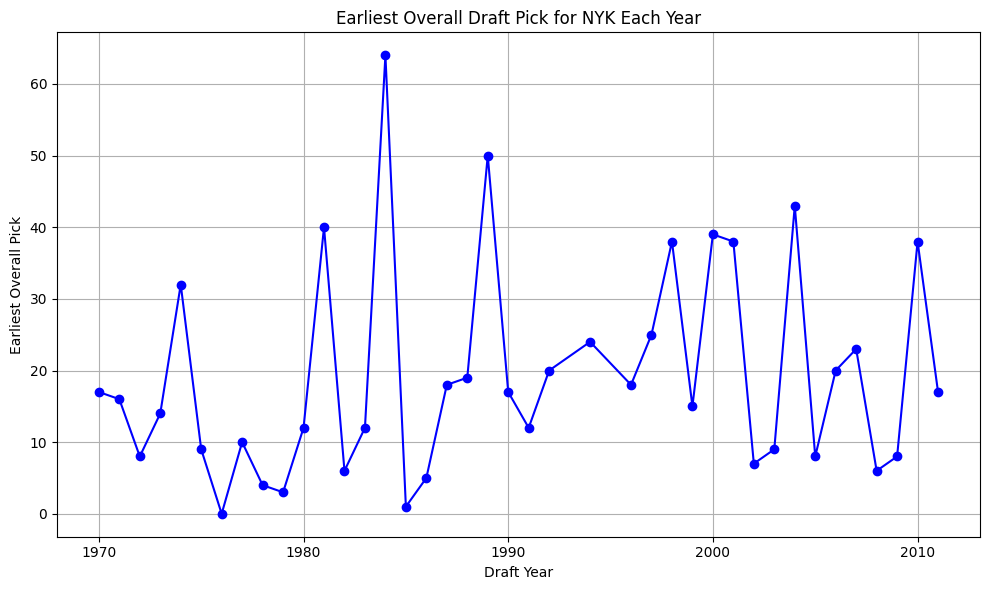

In [57]:
draft_df = pd.read_csv(f"{path}/basketball_draft.csv") #reinit
nyk_df = draft_df[(draft_df['tmID'] == 'NYK') & (draft_df['draftYear'] >= 1970)]

nyk_df = nyk_df.dropna(subset=['draftYear', 'draftRound', 'draftSelection', 'draftOverall']) #ensure non-empty column values

earliest_picks_df = nyk_df.loc[nyk_df.groupby('draftYear')['draftOverall'].idxmin()] #lowest overall pick
earliest_picks_df = earliest_picks_df[['draftYear', 'draftOverall']]

plt.figure(figsize=(10, 6))
plt.plot(earliest_picks_df['draftYear'], earliest_picks_df['draftOverall'], marker='o', linestyle='-', color='b')
plt.title('Earliest Overall Draft Pick for NYK Each Year')
plt.xlabel('Draft Year')
plt.ylabel('Earliest Overall Pick')
plt.grid(True)
plt.tight_layout()
plt.show()


I reloaded the draft data (in case of previous alterations) and filtered for only the rows where the teamID was 'NYK' indicating the pick was made by the Knicks, and the draftYear was >= 1970. I made sure that the draftYear, draftRound, draftSelection, and draftOverall column values were not empty in any of these rows, or they would be dropped. I grouped all of the rows by draftYear, as the team could have made multiple selections in one year, and found the row where the draftOverall was the lowest (indicating their earliest pick). I didn't use values for draftRound or draftSelection because there was no way to specify a single round when the earliest could be in the 1st round, 2nd, etc., and draftOverall is essentially a multiple of the other two columns anyway. Being left with the rows of each year's earliest pick, each tuple was then plotted on the graph of corresponding axises. 

We can see that the results are completely random year to year, where the slope between 3 or more datapoints is not even close to flat at any point. This could attest to the randomness of the NBA Draft Lottery, selecting teams for each overall pick almost completely randomly, other than their chances at a lottery pick based on that season's performance. With trades that send draft picks also occuring, we can see that the New York Knicks generally did not hold a draft strategy and used their earliest pick at different stages each season.

***Answering Question Number 5***: Which 20 players in NBA History have the best points scored to minutes played ratio in a single NBA All-Star Game?

Being selected for an NBA All-Star Game is a huge honor and priveledge in the NBA world. With the more recent performances in the All-Star Game (which wouldn't be depicted in this dataset that goes to 2011), a lot of fans have complained about there being no defense and player's chucking up 3-pointers to achieve ridiculous personal and team statlines by the end of the game. Using the allstar data, I was curious as to which players in the past have been the most impactful and offensively efficient when checking into an All-Star Game. 

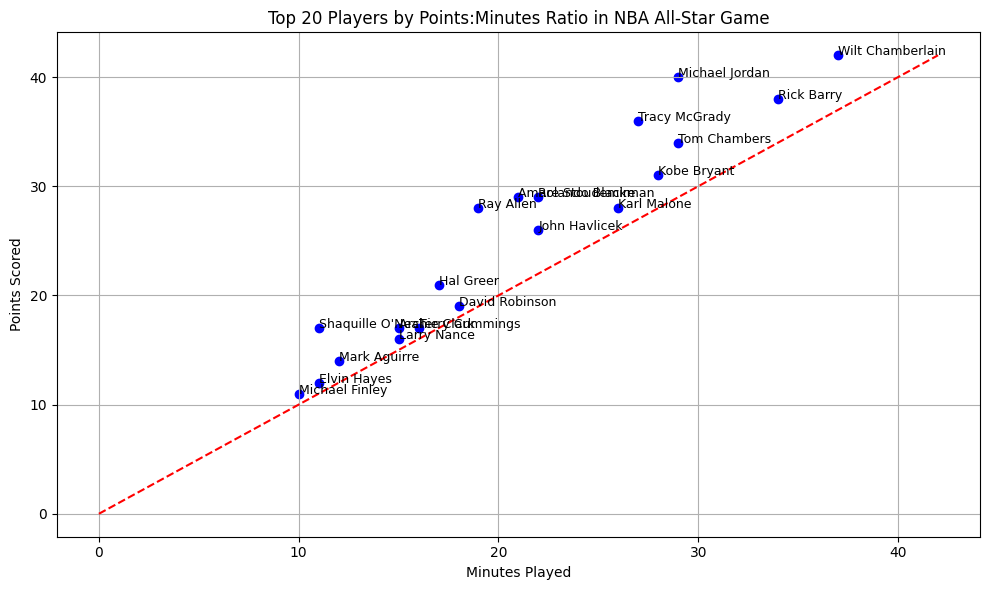

In [58]:
nba_allstar_df = allstar_df[(allstar_df['league_id'] == 'NBA') & (allstar_df['minutes'] >= 10)].copy()
#our ratio:
nba_allstar_df.loc[:, 'points_per_minute'] = (nba_allstar_df['points'] / nba_allstar_df['minutes']).round(2)
top_20 = nba_allstar_df.nlargest(20, 'points_per_minute')

# Plot the points vs. minutes for the top 20 players
plt.figure(figsize=(10, 6))
plt.scatter(top_20['minutes'], top_20['points'], color='b', marker='o')

# y = x
max_val = max(top_20['minutes'].max(), top_20['points'].max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='y = x')

for _, row in top_20.iterrows():
    plt.text(row['minutes'], row['points'], f"{row['first_name']} {row['last_name']}", fontsize=9) #print names for each datapoint

plt.title('Top 20 Players by Points:Minutes Ratio in NBA All-Star Game')
plt.xlabel('Minutes Played')
plt.ylabel('Points Scored')
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


Using my all-star players database, I saved a new variable state to my table after filtering for performances where at least 10 minutes were played and the all-star game was for the NBA (in comparison to for the ABA). I then calculated my statistic of interest: the minutes to points ratio in a single all-star game. For each row that was left after filtering, I simply divided the minutes column by the points column since each individual row represented a full NBA All-Star game performance. After sorting this resulting row in descending row, I got my top 20 results and plotted them on a graph. To further emphasize this ratio, I plotted the line y=x which depicts a 1:1 or 1.0 ratio of these values. 

We can note from this graph that the top 20 performances were all above the line y=x, which means every single player scored more points than the minutes they played. Another important analysis is that the further above each datapoint was from the y=x line denoted the best ratios in which a player logged a considerable amount more in points scored than minutes played. We can see some of the best player's in the basketball world on this list with some ridiculous performances against the league's best talent at the time. This includes Michael Jordan with 40 points in 28 minutes and Ray Allen with 28 points in 18 minutes. Being able to control your team's offense, and to this positive extent, while playing amongst the best names spoke to the caliber of these players.  

***Answering Question 6A***: What percentage of all players that have played in the All-Star Game have been inducted into the Basketball HOF?

Every year, the NBA hosts it's All-Star Game to recognize the best players in the league around the midway point of the season. Every year, a lot of great names make the team, usually in the starting lineup. Regardless of the integrity of the All-Star game, the names in it are undeniable. However, being inducted into the Hall of Fame is an honor that cements your name in the world of this sport forever. It is eternal and excluded to the best of the best in terms of player inductees. In order to combine two of these datasets, I decided to discover how many of those All-Star names went on to be cemented in the HOF and the percentage of all unique All-Stars to be inducted. 

Percentage of All-Star players inducted into the Hall of Fame: 23.61%


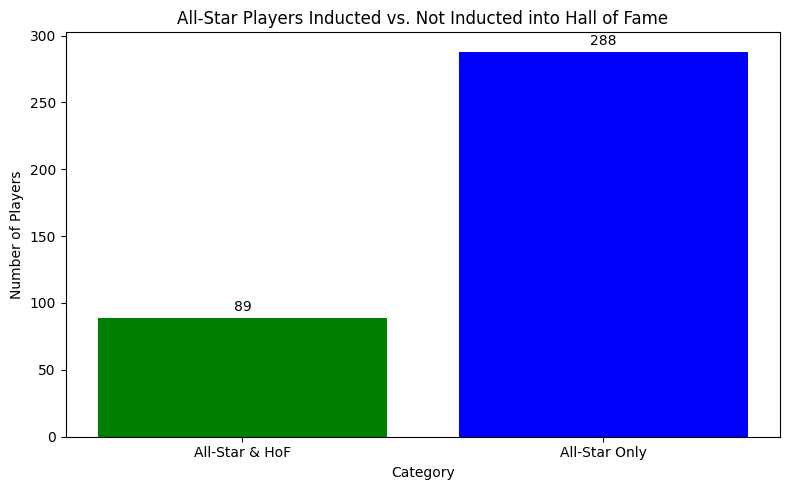

In [59]:
allstar_players = set(allstar_df['player_id'].unique()) #unique player_ids through allstar rows
hof_players = set(hof_df[hof_df['category'] == 'Player']['hofID'].unique()) #unique hofIDs through HOF rows of player category

players_in_both = allstar_players.intersection(hof_players)
players_not_in_hof = allstar_players - hof_players

counts = {
    "All-Star & HoF": len(players_in_both),
    "All-Star Only": len(players_not_in_hof),
}

percentage_in_hof = (len(players_in_both) / len(allstar_players)) * 100

print(f"Percentage of All-Star players inducted into the Hall of Fame: {percentage_in_hof:.2f}%")

plt.figure(figsize=(8, 5))
plt.bar(counts.keys(), counts.values(), color=['green', 'blue'])
plt.title('All-Star Players Inducted vs. Not Inducted into Hall of Fame')
plt.ylabel('Number of Players')
plt.xlabel('Category')

# add sum annotations
for i, (category, count) in enumerate(counts.items()):
    plt.text(i, count + 5, str(count), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


Using the allstar and hof datasets, I saved two new sets that could then become comparable. One was of all the unique player_ids out of all the all-star performances logged in the dataset. The second was of all the unique hofID's where the category for the inductee was 'player'. By taking the intersection of these two, I found the unique ID's that appeared in both, denoting players that were an All-Star at lease once and were then inducted into the HOF (as a player). By subtracting the hof_players from the all_star players, I was then left with player's that showed up in all_star but not in hof, the other half of these questions. By count each of these, I obtained the values I would use for my barchart: Players selected as an All-Star and inducted into the HOF vs Players selected as an All-Star and were never inducted into the HOF. Furthermore, dividing the first value by our total unique player_ids in the allstar table leaves us with the percentage of all players selected as an allstar that also became HOF inductees. 

I was extremely surprised with the results of this data. For one, I discovered that 23.61% of all all-star players would become Hall of Fame inductees. That is almost 1 in 4 players. Although, this finding is indirect because the best players (those that are likely to later become inducted) are selected for the all-star year for the majority of their seasons in the NBA. This takes away spots from new player_ids being added to the list. Another shortcoming of this result may be that it doesn't include any players that were an All-Star at least once and were then inducted into the HOF under a different category, such as a contributor in the basketball world or coach. Regardless, I was amazed to find that 89 of the 377 unique all-stars would enter the HOF. This could further indicate a strong correlation with being selected as an all-star and your chances of being inducted into the HOF.

***Answering Question Number 6B***: What percentage of all players that have played in at least 3 All-Star Game have been inducted into the Basketball HOF?

The previous question inspired me to dig deeper into the data I was trying to analyze. I wanted an even better metric for an indication of a strong correlation between being selected for an all-star game and joining the HOF. My next code does the same thing as the previous queries, just after making the set of all-star players filtered by those that played in 3 or more all-star games. I randomly chose this number from my understanding of all-star selections. Although it is possible for an average player to have a great season once or twice and become an all-star, I believe that 3 or more selections would put a player into the next category. 

Percentage of All-Star players (3+ games) inducted into the Hall of Fame: 44.86%


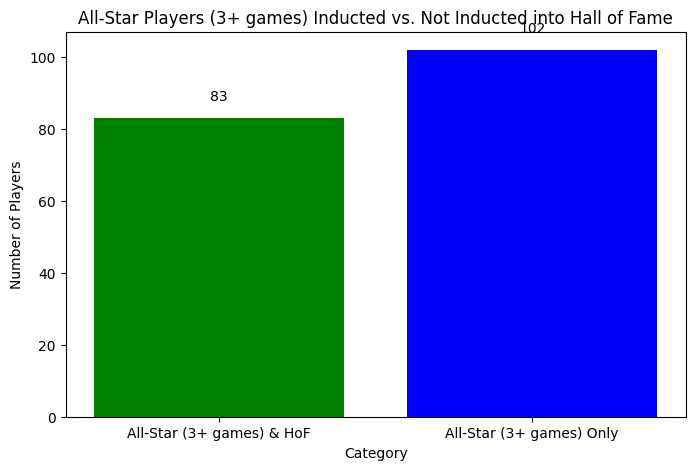

In [60]:
# Filter to only keep players with at least 3 All-Star game appearances
players_with_3_games = (
    allstar_df.groupby('player_id')
    .filter(lambda x: len(x) >= 3)['player_id']
    .unique()
)

# Convert to a set for comparison
allstar_players_3_games = set(players_with_3_games)
hof_players = set(hof_df[hof_df['category'] == 'Player']['hofID'].unique())

# extract overlapping and non-overlapping players
players_in_both = allstar_players_3_games.intersection(hof_players)
players_not_in_hof = allstar_players_3_games - hof_players

counts = {
    "All-Star (3+ games) & HoF": len(players_in_both),
    "All-Star (3+ games) Only": len(players_not_in_hof),
}

percentage_in_hof = (len(players_in_both) / len(allstar_players_3_games)) * 100
print(f"Percentage of All-Star players (3+ games) inducted into the Hall of Fame: {percentage_in_hof:.2f}%")

plt.figure(figsize=(8, 5))
plt.bar(counts.keys(), counts.values(), color=['green', 'blue'])
plt.title('All-Star Players (3+ games) Inducted vs. Not Inducted into Hall of Fame')
plt.ylabel('Number of Players')
plt.xlabel('Category')

# add sum annotations
for i, (category, count) in enumerate(counts.items()):
    plt.text(i, count + 5, str(count), ha='center', fontsize=10)

plt.show()

Like I explained, I used a lambda function to filter for players that have played in at least 3 all star games. Since each row in the dataframe represented an individual all-star game performance, I just found the length of each group of player_ids, which would be how many rows each unique player_id had in the df. Then following the same steps as 6A, I created a barchart of players that have played in at least 3 all-star games and whether or not they were inducted to the HOF. 

These results were even more surpising, with almost 45% of all players with at least 3 all-star appearances were also members of the HOF. 

***Answering Question Number 6C***: Does the amount of all-star selections a player has have a strong correlation with whether or not they are inducted to the HOF?

Grouping the dataset similar to the last two questions, but for the exact amount of performances a player logged, gave us way greater insight into if a player could expect a Hall of Fame nomination after a certain amount of all-star selections. 

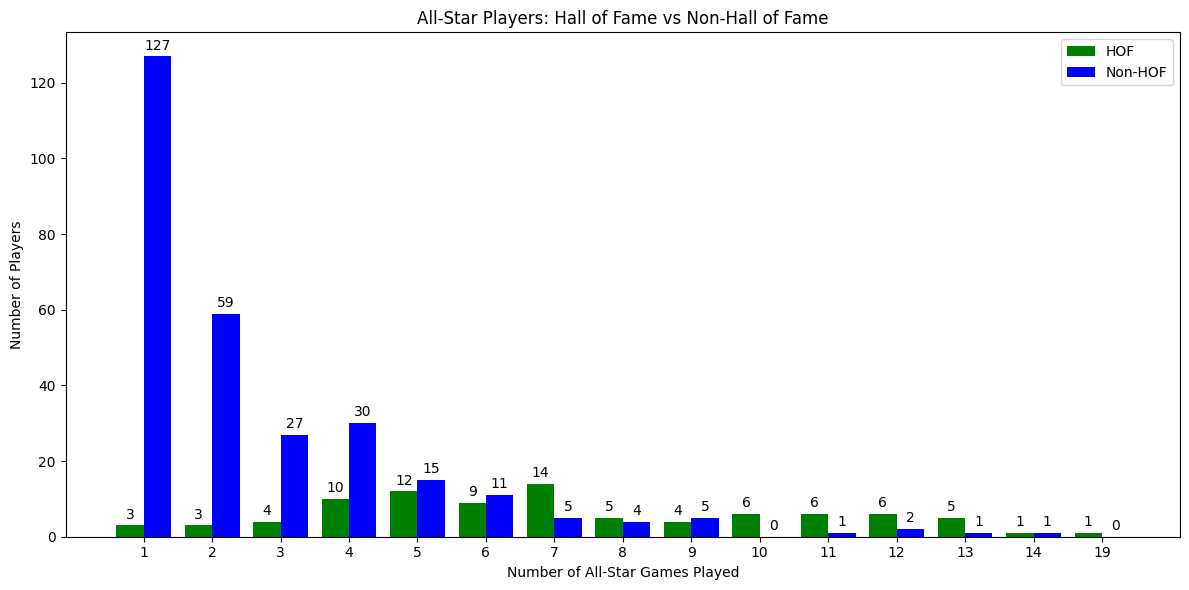

In [61]:
# group the allstar database by player_id and put the size of each group in dict
allstar_game_counts = allstar_df.groupby('player_id').size().to_dict()

# get each unique hofID which we will use to determine if the playerID is in HOF
hof_players = set(hof_df[hof_df['category'] == 'Player']['hofID'].unique())
hof_status = {player_id: (player_id in hof_players) for player_id in allstar_game_counts.keys()}

#now fill out HOF info for each playerID in each group of total all-star games played
game_count_data = {}
for player_id, game_count in allstar_game_counts.items():
    is_hof = hof_status[player_id]
    if game_count not in game_count_data:
        game_count_data[game_count] = {'HOF': 0, 'Non-HOF': 0}
    if is_hof:
        game_count_data[game_count]['HOF'] += 1
    else:
        game_count_data[game_count]['Non-HOF'] += 1


game_counts = sorted(game_count_data.keys())  # sort by each group's exact count
hof_counts = [game_count_data[count]['HOF'] for count in game_counts]
non_hof_counts = [game_count_data[count]['Non-HOF'] for count in game_counts]

x = range(len(game_counts))
width = 0.4

plt.figure(figsize=(12, 6))
plt.bar(x, hof_counts, width, label='HOF', color='green', align='center')
plt.bar([i + width for i in x], non_hof_counts, width, label='Non-HOF', color='blue', align='center')
plt.xlabel('Number of All-Star Games Played')
plt.ylabel('Number of Players')
plt.title('All-Star Players: Hall of Fame vs Non-Hall of Fame')
plt.xticks([i + width / 2 for i in x], game_counts)
plt.legend()

# add sum annotations for both bars in each group
for i, count in enumerate(hof_counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=10)
for i, count in enumerate(non_hof_counts):
    plt.text(i + width, count + 1, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


First, we go through the allstar_df to create a dictionary of all the possible exact all-star appearances made by each unique player_id. Using this player_id, we make a connection with the hof_df to check for that id in the hofID column, telling us if that player was inducted to the HOF. Then, for each player in each possible number of selections, we check that player's hof_status from above. If the number of selections isn't in our data yet, we initialize it. If it exists, we either add 1 to the 'and selected to HOF' or 'and weren't selected to HOF'. 

These results give us a much broader view of the scope of this relationship we intend to analyze. In the beginning, where the all-star selections are fewer, we can see the blue bar (for those that weren't inducted to the HOF) trumped the green bar (for those that were later inducted to the HOF). However, as the number of all-star games played increased, we can see the two bars even out, until the green bar begins to trump our other value. Of course, the sum of the two bars decreases as selections increase, because players with that multitude of all-star selections become increasingly rare. Regardless, there is a visible strong correlation. This result also supports my previous findings, as we can see the general trend and sums after 3 all-star selections converges to approximately 50%. 

***Answering Question Number 7***: How many HOF inductees make up each category, but specifically, how many contributors, referees, and teams are in the HOF?

After exploring with the HOF dataset for so long, I became intruiged with the many categories that make up the HOF inductees. I wasn't exactly aware that those other than players and coaches could be initiated. Therefore, I queried the database by grouping each category, allowing me to explore the make up of our beloved Hall of Fame.  

Total count of inductees in category 'Contributor': 58
Total count of inductees in category 'Referee': 14
Total count of inductees in category 'Team': 9


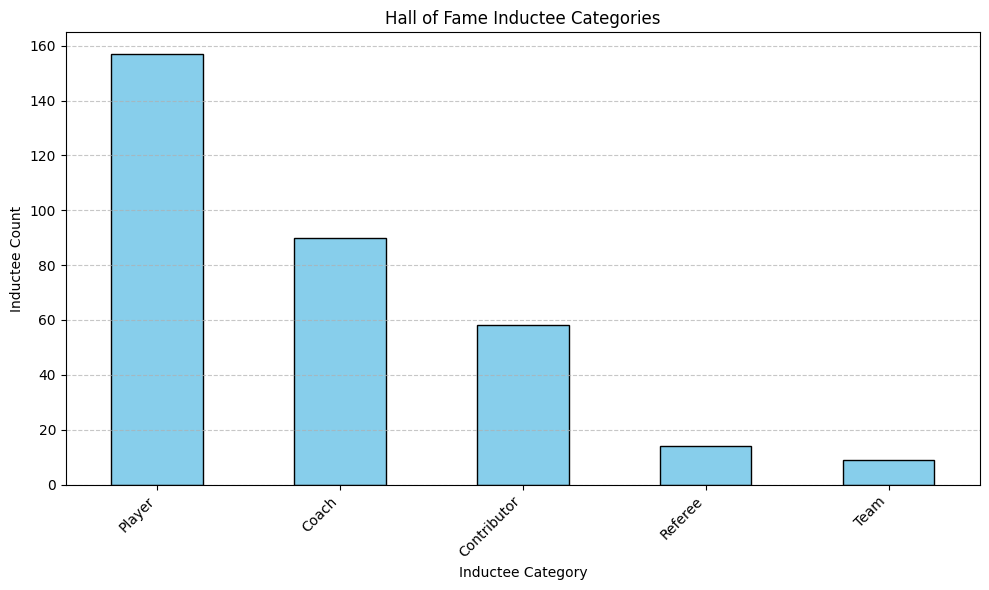

In [62]:
category_counts = hof_df['category'].value_counts()

categories_of_interest = ['Contributor', 'Referee', 'Team']
for category in categories_of_interest:
    count = hof_df[hof_df['category'] == category].shape[0]
    print(f"Total count of inductees in category '{category}': {count}")

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Hall of Fame Inductee Categories')
plt.xlabel('Inductee Category')
plt.ylabel('Inductee Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


For each unique value in the 'category' column, I counted the sum of the rows with the same category. I was also interested in the exact number of contributors, referees, and team's that were inducted, so I queried the results for these specific categories. 

Not surprisingly, player's made up the majority (almost half) of all HOF inductees. I researched a contributor to be 'someone who has made significant contributions to professional football outside of playing or coaching' (such as broadcasters and analysts). Interestingly enough, 9 teams as an entire entity were inducted. Some of these included names we know such as the Harlem Globetrotters and 1992 US Men's Olympic Team. This could definitely speak to the historical significance of these entities and how there's more to professional basketball than just the players. 

***Answering Question Number 8***: What percentage of games does a team win in a season where their coach is awarded Coach of the Year?

From looking at the awards_coaches and coaches datasets, I had data for all the coaches that have won an award, and each coaches stats for a season with a team. I was curious to find any relationship with a coach's win percentage the same year that they were named the league's best coach. 

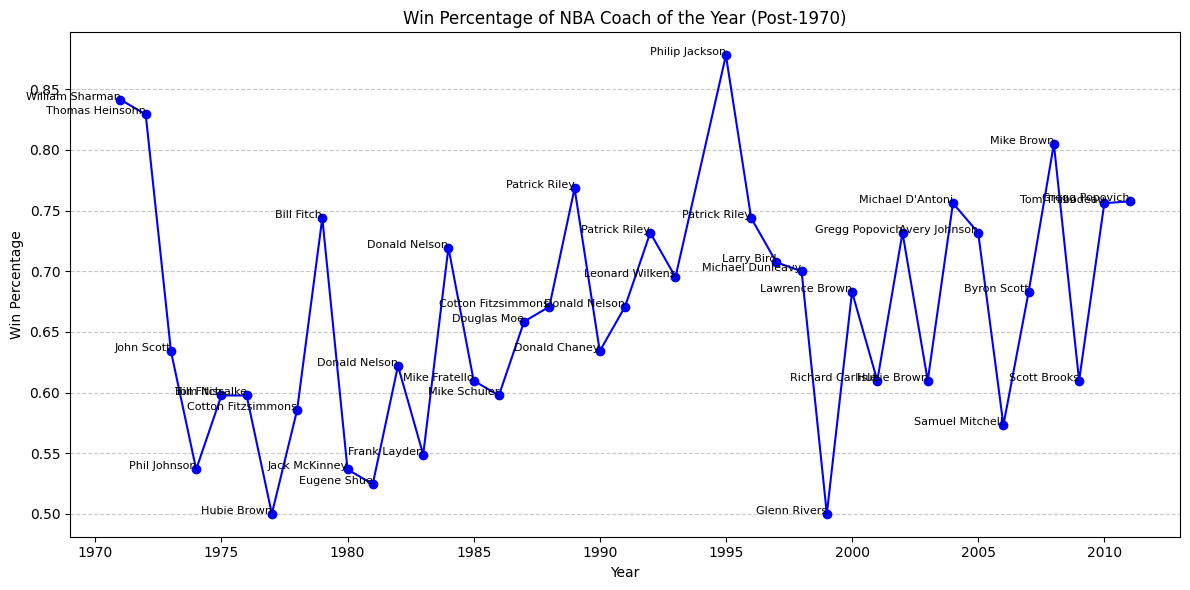

In [63]:
coach_awards = awards_coaches_df[(awards_coaches_df['award'] == 'NBA Coach of the Year') & (awards_coaches_df['year'] > 1970)]

# merge table based on 'coachID' and 'year'
merged_df = coach_awards.merge(coaches_df, on=['coachID', 'year'], how='inner')
merged_df['win_percentage'] = merged_df['won'] / (merged_df['won'] + merged_df['lost'])

coach_name_mapping = master_df.set_index('bioID')[['firstName', 'lastName']].to_dict('index') #name mapping to master
merged_df['firstName'] = merged_df['coachID'].map(lambda x: coach_name_mapping.get(x, {}).get('firstName', 'Unknown'))
merged_df['lastName'] = merged_df['coachID'].map(lambda x: coach_name_mapping.get(x, {}).get('lastName', 'Unknown'))
merged_df['full_name'] = merged_df['firstName'] + ' ' + merged_df['lastName']

merged_df = merged_df.sort_values('year')


plt.figure(figsize=(12, 6))
plt.plot(merged_df['year'], merged_df['win_percentage'], marker='o', color='blue')

# add name annotations
for _, row in merged_df.iterrows():
    plt.text(row['year'], row['win_percentage'], row['full_name'], fontsize=8, ha='right')

plt.title('Win Percentage of NBA Coach of the Year (Post-1970)')
plt.xlabel('Year')
plt.ylabel('Win Percentage')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


I first filtered the awards_coaches dataset for only rows where the award won was 'Coach of the Year' and for awards won after 1970. Based on the coachID and the year that the award was won, I was able to merge my dataset with the Coaches table, containing that same coaches Wins and Losses with whichever team they led that year. I then also used the Master file to convert the coachID into their first name and last name, to use on my plot. After additionally sorting by year, I plotted each Coach of the Year winner from 1970 to 2011 and their corresponding win percentage. 

Something I found interesting from these results is that every single coach on the list achieved a win percentage of at least 50%. The majority of these coaches led their team to a win percentage above 60%, which is absolutely enough to solidfy the first or second seed in your conference that year. At the peak of this graph is coach Philip Jackson, who led the 1995-96 bulls on their record setting 72-10 record (since broken by the 2016 GSW).

### Conclusion: 

Through this data analysis, I was able to deepen my understanding of many scopes in the world of professional men's basketball. I explored many datasets, including statistics on coaches, all-star performances, hall of fame inductees, and more. Furthermore, I used connecting datasets (abbrev, master) with filler information such as first name, last name, and code to map my queries across other datasets that were similar in their IDs of certain people (players, coaches, etc.). I believe there was absolutely valuable insight gained from the questions I answered. 

For example, finding the top 20 players based on points scored per minute in an NBA All-Star Game rendered that scoring efficiency is a key factor in standout performances. Players like Michael Jordan and Ray Allen have proven themselves as not only exceptional players but also highly efficient in elite settings. Furthermore, we learned that 23.61% of players who have made at least one All-Star appearance eventually earned Hall of Fame status, while nearly 45% of players with 3 or more All-Star appearances were inducted. This strong correlation suggests that consistent All-Star recognition is a predictor of Hall of Fame induction, reinforcing the importance of sustained excellence in the league for the greatest of honors. However, a significant portion of the HOF inductees is made up of contributors, referees, and teams, highlighting the multifaceted nature of the Basketball Hall of Fame. 

If you are interested in this database, you can access it at https://www.kaggle.com/datasets/open-source-sports/mens-professional-basketball/data and use these same fields to conduct similar queries depending on your scope of interest.